In [1]:
## 🔹 1. Import Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#  Set Styles
# sns.set(style="whitegrid")

In [3]:
# Load data
df = pd.read_csv(r'C:\Users\HP\Downloads\python_datasets.csv', encoding_errors='ignore')

In [4]:
# Convert datatypes safely
columns_to_convert = ['price', 'minimum_nights', 'reviews_per_month', 'rating']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Better datetime conversion
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d', errors='coerce')

# Replace and convert bedrooms & baths properly
df['bedrooms'] = df['bedrooms'].replace("Studio", 0)
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

df['baths'] = df['baths'].replace("Not specified", np.nan)
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')

# Remove invalid rows
df.dropna(subset=['price', 'bedrooms', 'baths', 'latitude', 'longitude'], inplace=True)


In [7]:
## 🔹 3. Basic Dataset Info

print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 20723 entries, 1 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20723 non-null  float64       
 1   name                            20723 non-null  object        
 2   host_id                         20723 non-null  int64         
 3   host_name                       20723 non-null  object        
 4   neighbourhood_group             20723 non-null  object        
 5   neighbourhood                   20723 non-null  object        
 6   latitude                        20723 non-null  float64       
 7   longitude                       20723 non-null  float64       
 8   room_type                       20723 non-null  object        
 9   price                           20723 non-null  float64       
 10  minimum_nights                  20723 non-null  float64       
 11  number_

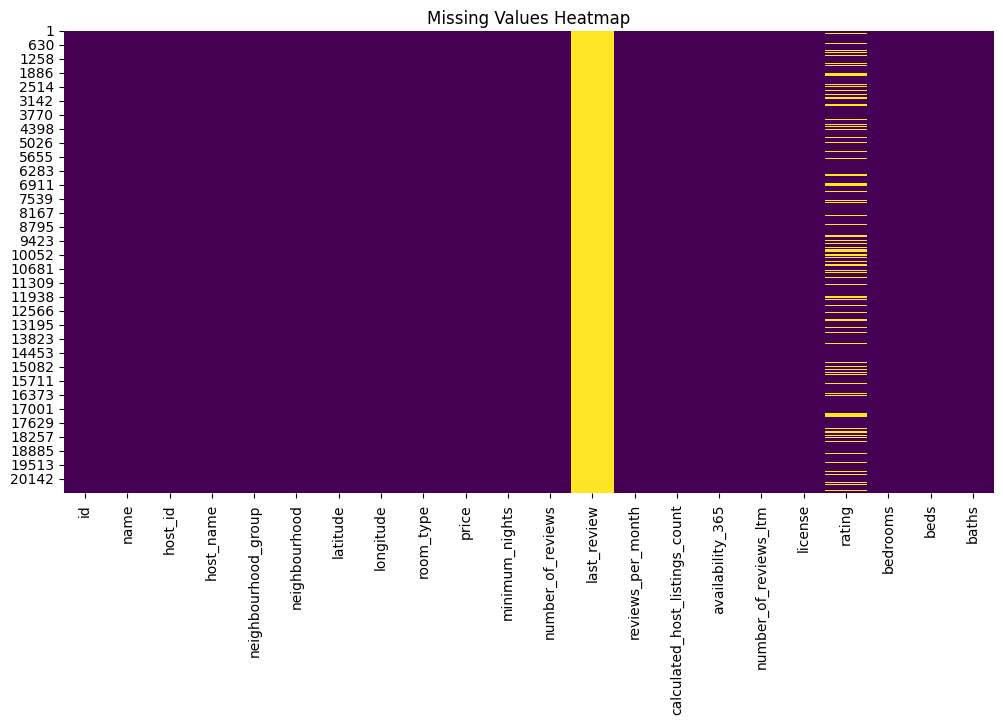

In [8]:
## 🔹 4. Visualizing Missing Data

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


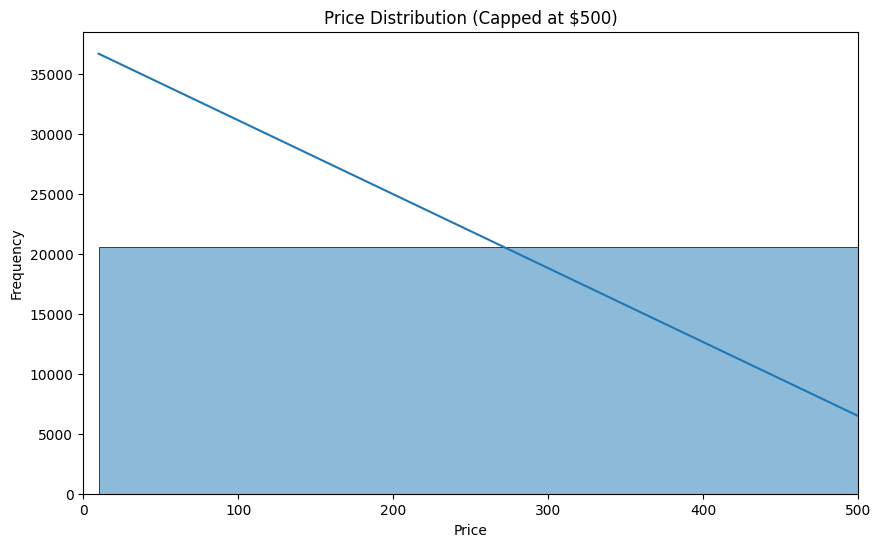

In [9]:

## 🔹 5. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 500)
plt.title("Price Distribution (Capped at $500)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

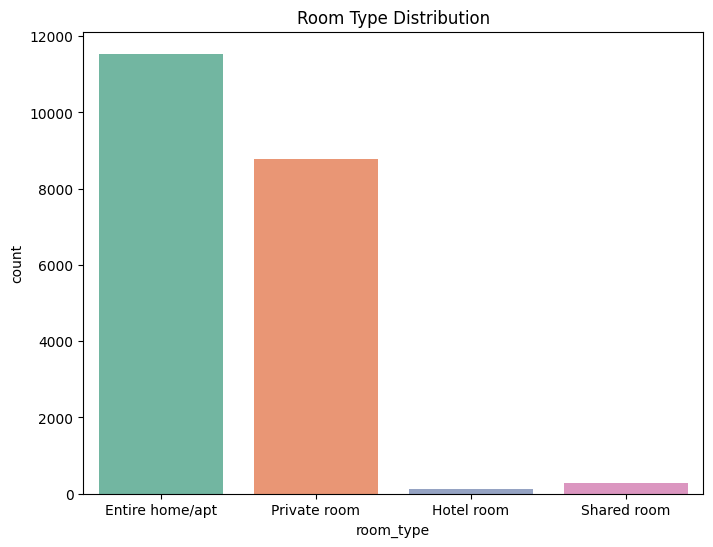

In [10]:
## 🔹 6. Room Type & Neighbourhood Analysis

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type', hue='room_type', palette='Set2', legend=False)
plt.title("Room Type Distribution")
plt.show()


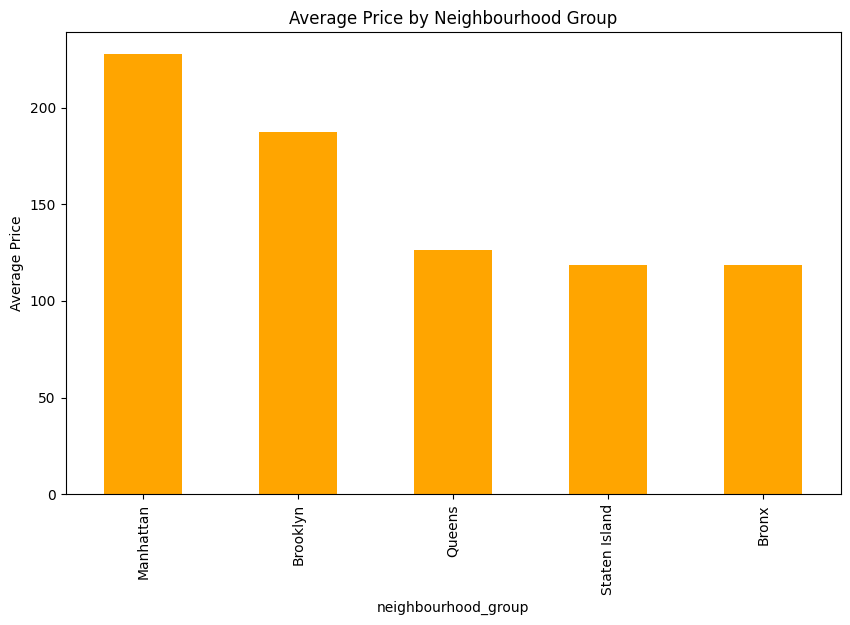

In [11]:
# Average price by neighbourhood group
avg_price_group = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_group.plot(kind='bar', color='orange')
plt.ylabel("Average Price")
plt.title("Average Price by Neighbourhood Group")
plt.show()

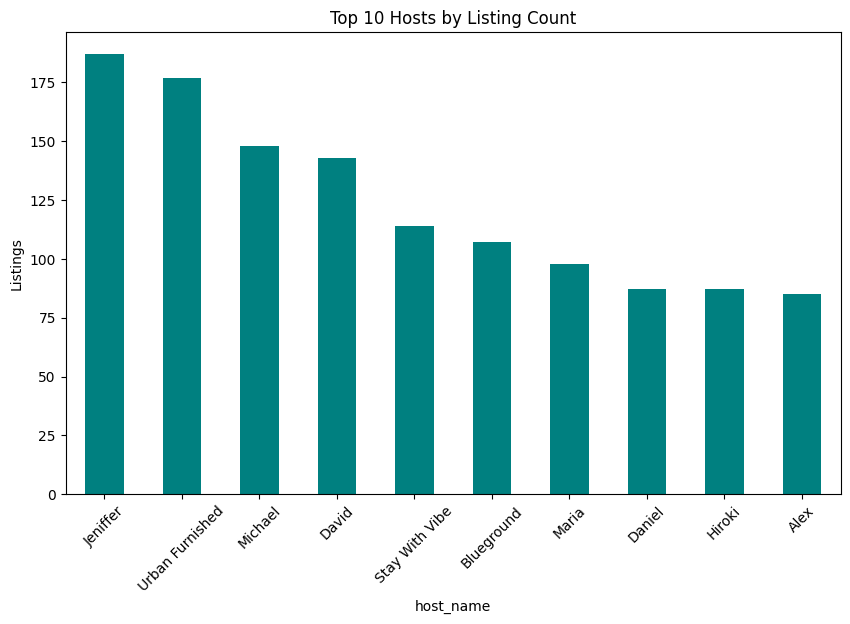

In [12]:
## 🔹 7. Top Hosts and Popular Neighbourhoods

# Top 10 hosts by number of listings
top_hosts = df['host_name'].value_counts().head(10)
top_hosts.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title("Top 10 Hosts by Listing Count")
plt.ylabel("Listings")
plt.xticks(rotation=45)
plt.show()

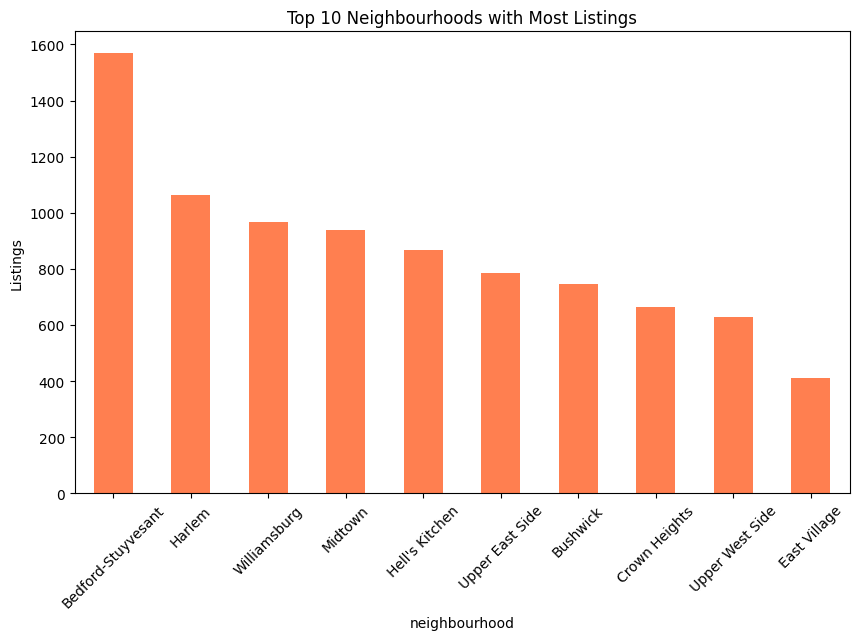

In [13]:
# Top 10 neighbourhoods
top_neigh = df['neighbourhood'].value_counts().head(10)
top_neigh.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title("Top 10 Neighbourhoods with Most Listings")
plt.ylabel("Listings")
plt.xticks(rotation=45)
plt.show()

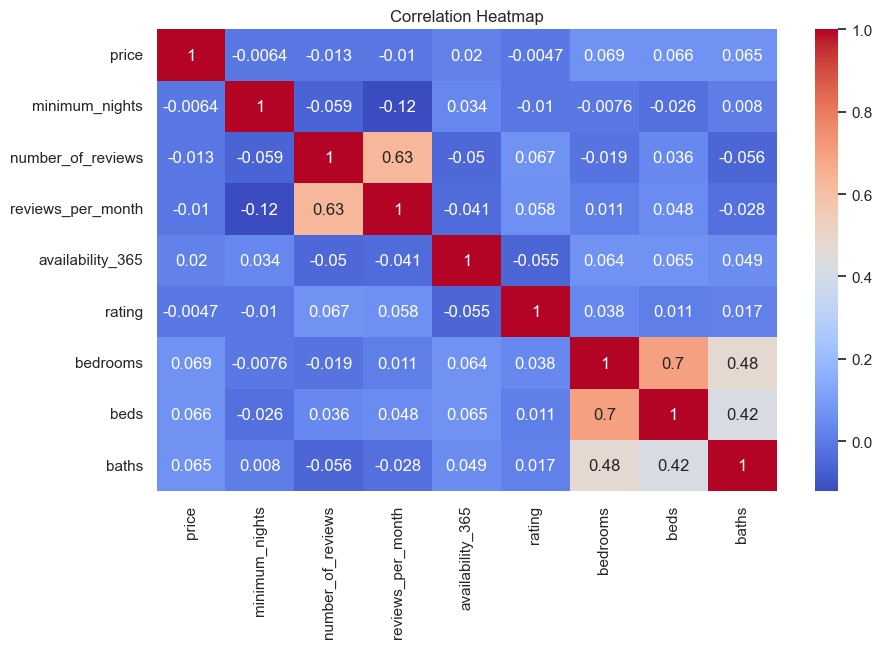

In [17]:
## 🔹 8. Correlation Heatmap

numeric_df = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'rating', 'bedrooms', 'beds', 'baths']]
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

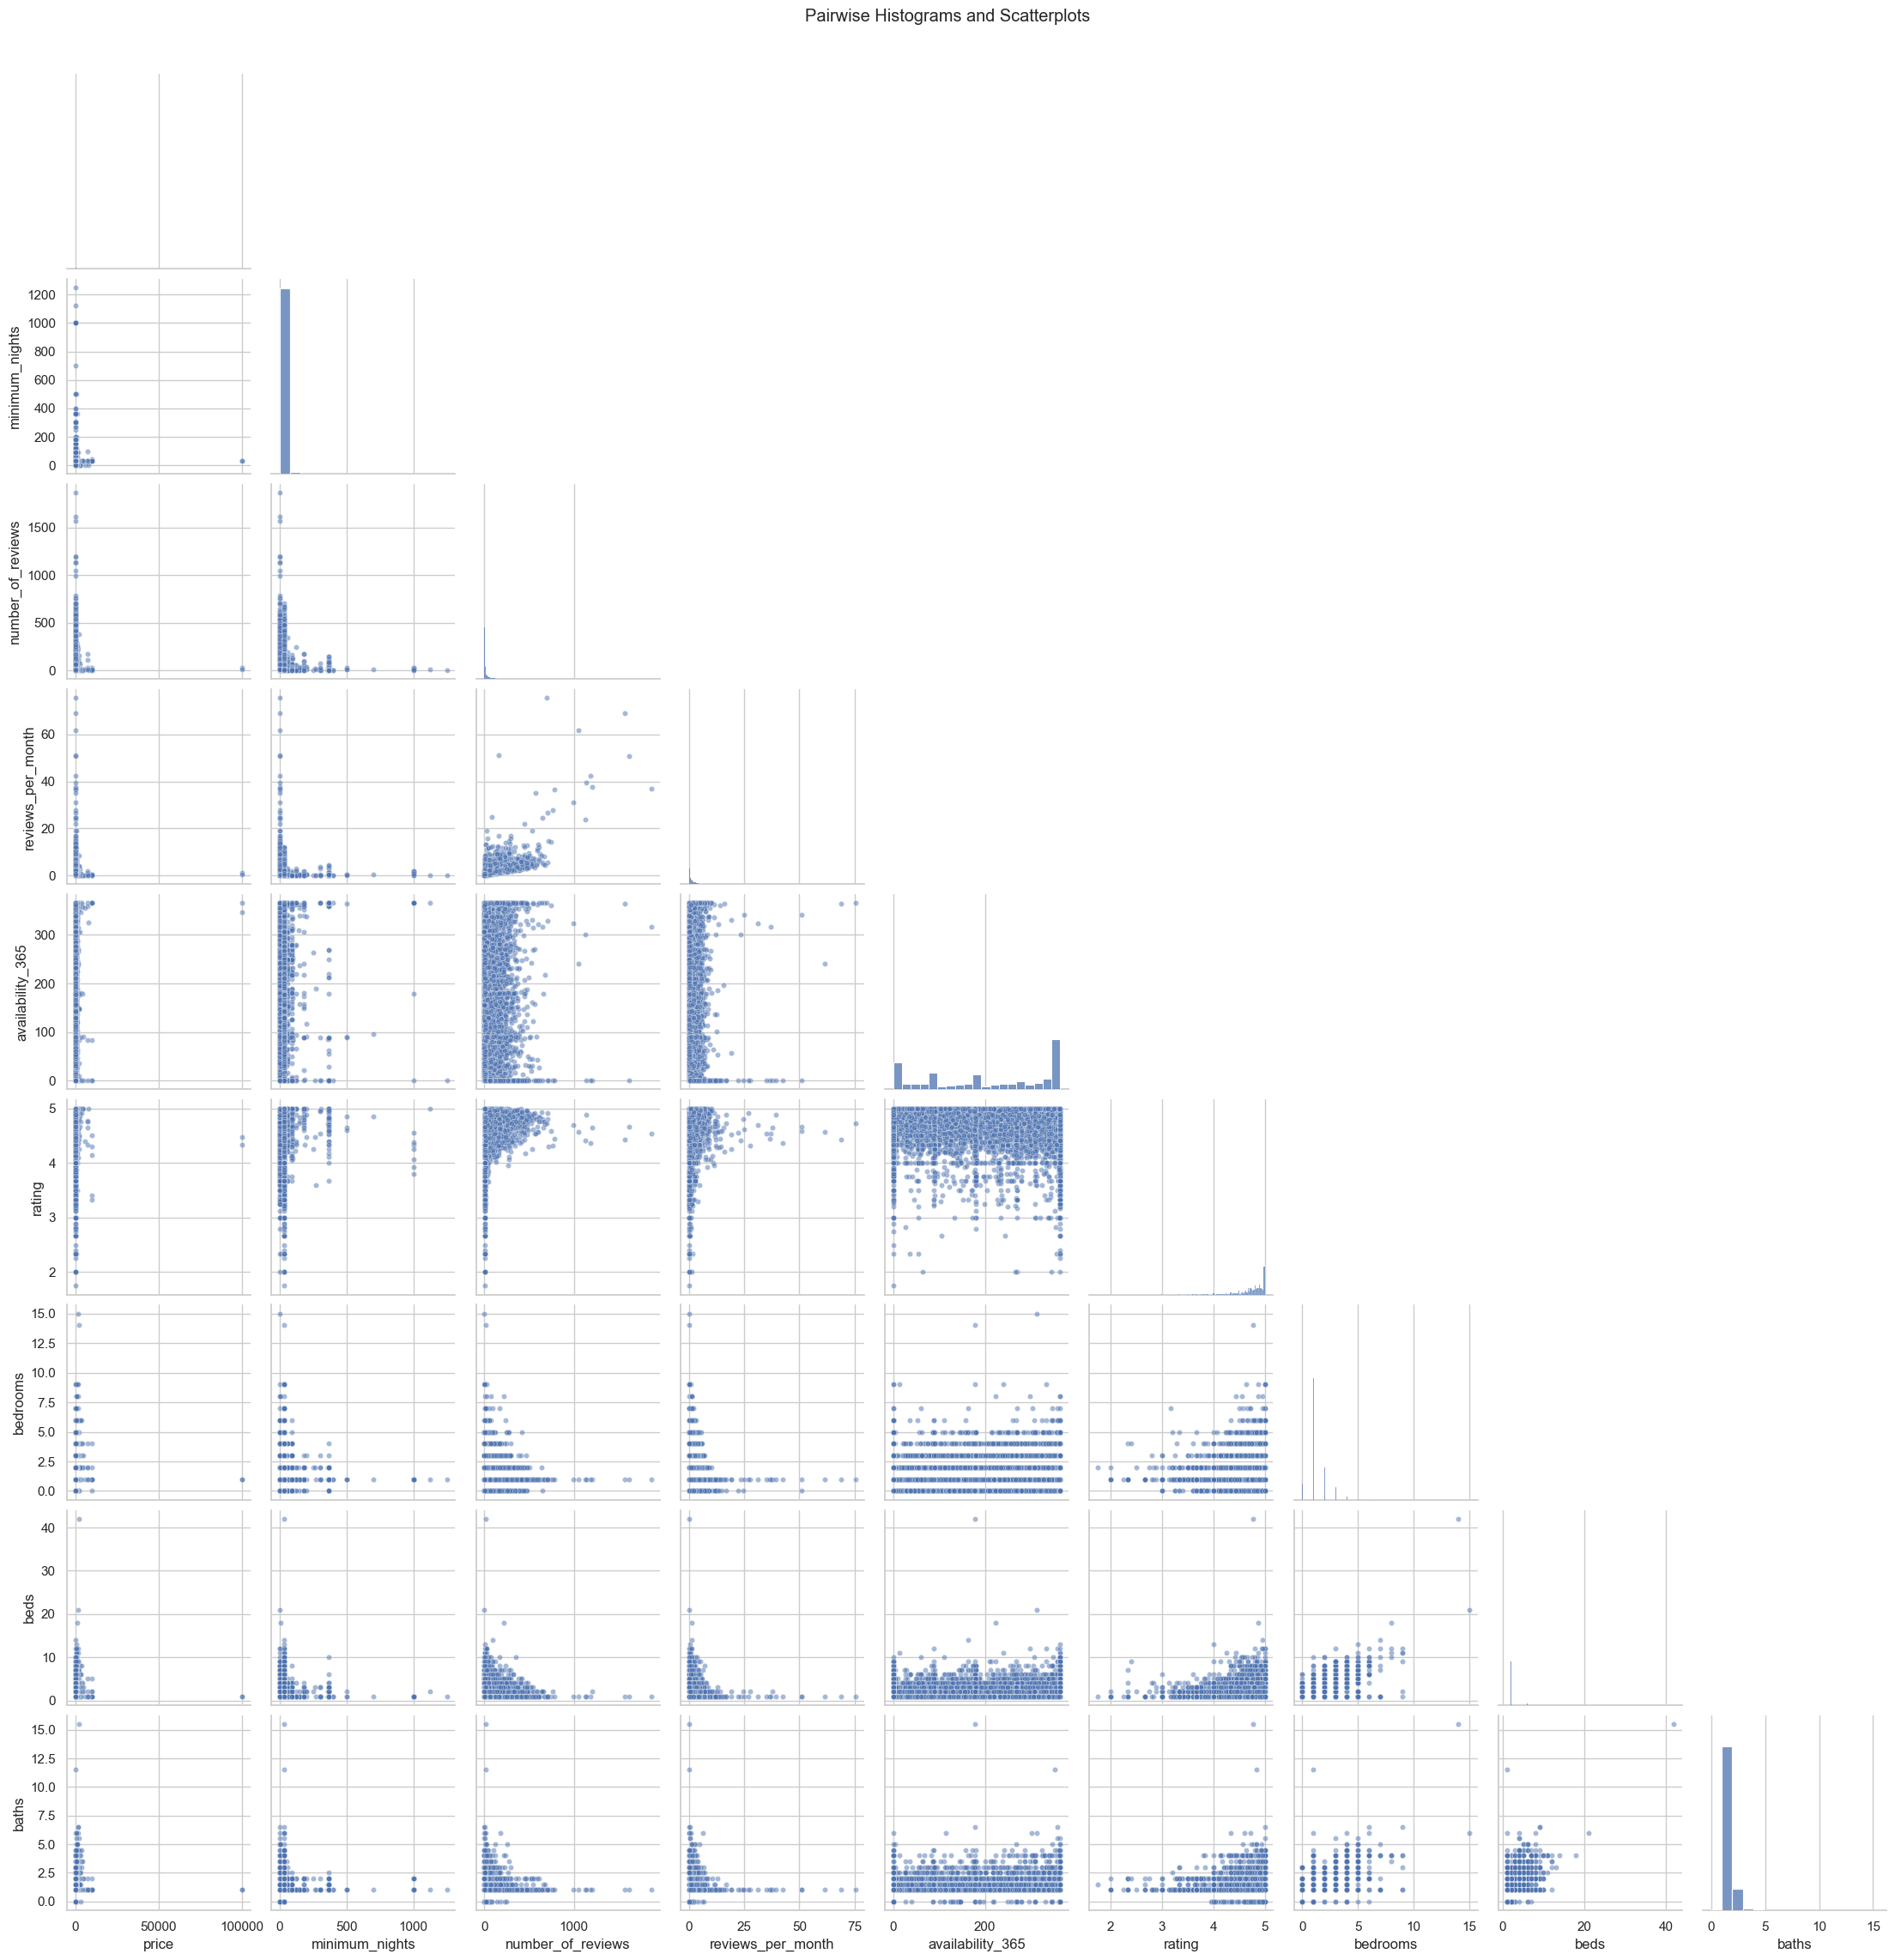

In [18]:
## 🔹 9. Histogram Matrix (Pairplot)

num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
            'availability_365', 'rating', 'bedrooms', 'beds', 'baths']

sns.pairplot(df[num_cols], corner=True, diag_kind='hist', plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Pairwise Histograms and Scatterplots", y=1.02)
plt.show()

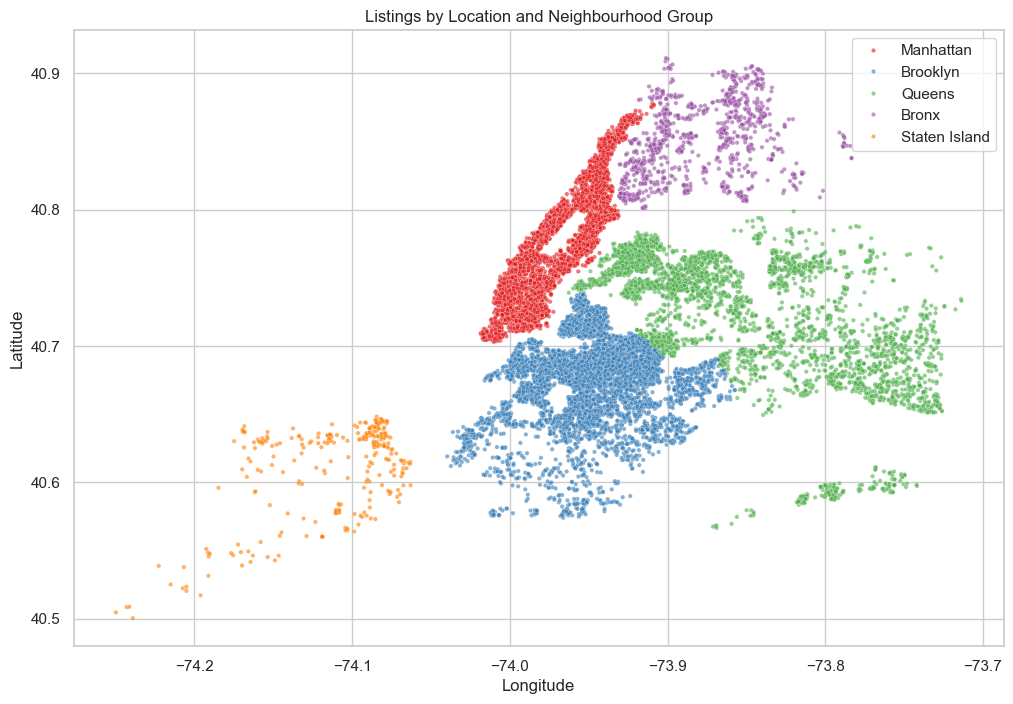

In [19]:

## 🔹 10. Geospatial Plot

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, palette='Set1', s=10, alpha=0.6)
plt.title("Listings by Location and Neighbourhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right')
plt.show()

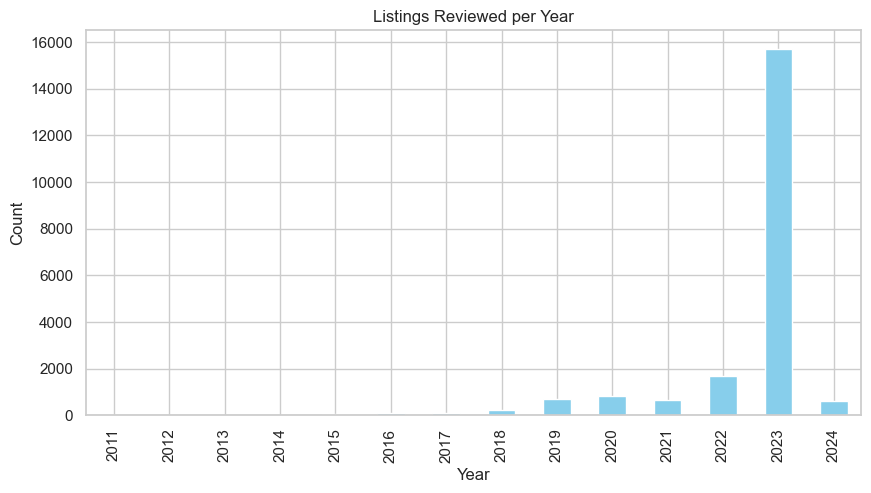

In [20]:
## 🔹 11. Time Series Analysis

# Listings over time by review date
df_by_date = df.dropna(subset=['last_review'])
df_by_date['year'] = df_by_date['last_review'].dt.year
reviews_by_year = df_by_date.groupby('year')['id'].count()

reviews_by_year.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Listings Reviewed per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

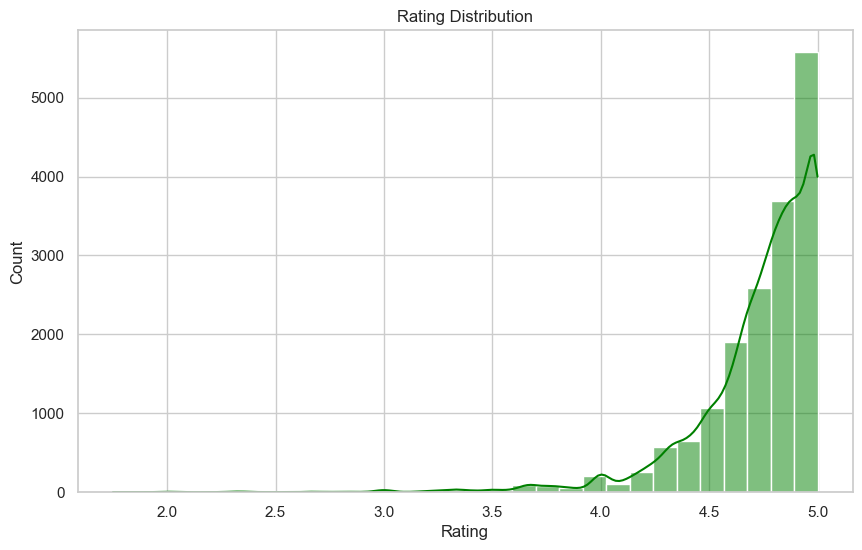

In [21]:
## 🔹 12. Ratings & Availability

# Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'].dropna(), bins=30, kde=True, color='green')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

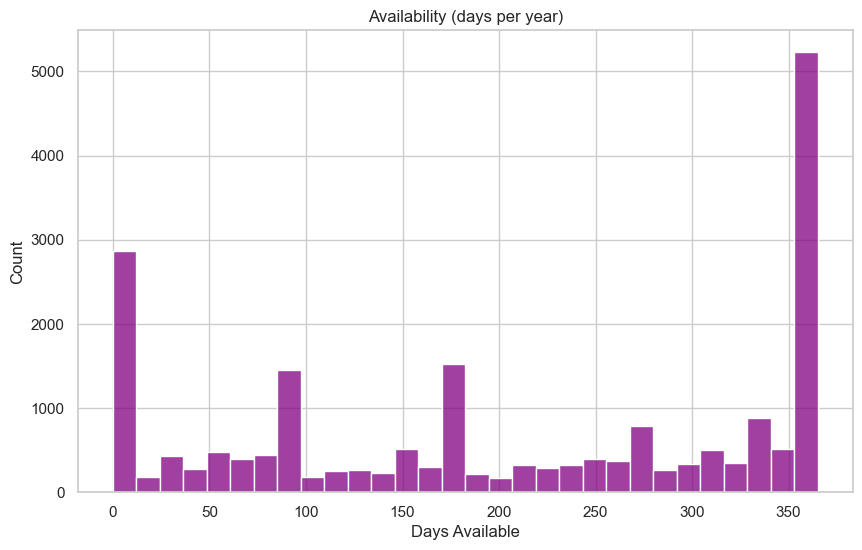

In [22]:
# Availability
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=False, color='purple')
plt.title("Availability (days per year)")
plt.xlabel("Days Available")
plt.ylabel("Count")
plt.show()